In [75]:
import numpy as np
import pandas as pd
import os
from dotenv import load_dotenv
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm

load_dotenv()
TIINGO_API_KEY = os.getenv("TIINGO_APIKEY")

In [77]:
df_a = pdr.get_data_tiingo('GOOG', api_key=TIINGO_API_KEY, start='2015-01-01')
df_b = pdr.get_data_tiingo('GOOGL', api_key=TIINGO_API_KEY, start='2015-01-01')

In [78]:
## we need to set the index as data
# convert multiindex to singel index
df_a.index = df_a.index.get_level_values('date')

In [79]:
## we need to set the index as data
# convert multiindex to singel index
df_b.index = df_b.index.get_level_values('date')

In [80]:
## Checking for cointegration
stock_a = df_a['adjClose']
stock_b = df_b['adjClose']

score, p_value,_ = coint(stock_a, stock_b)

print(f"Cointegration Test P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: The pair IS cointegrated (p < 0.05). We can proceed!")
else:
    print("Result: The pair is NOT cointegrated. (We'd stop here)")

Cointegration Test P-Value: 0.0106
Result: The pair IS cointegrated (p < 0.05). We can proceed!


Plotting with 2735 overlapping data points.


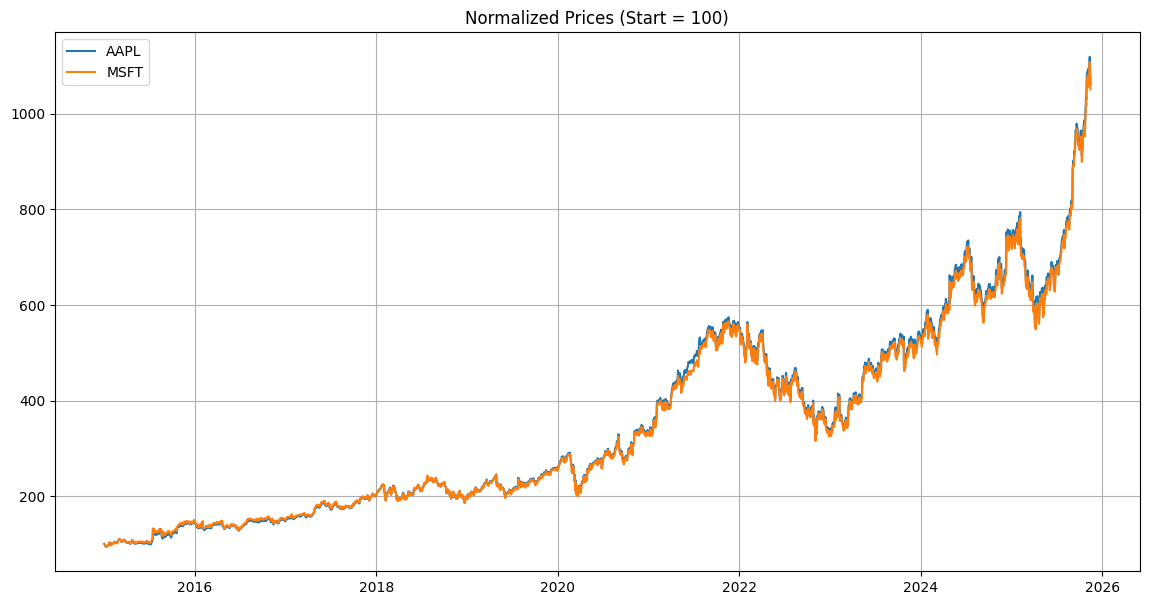

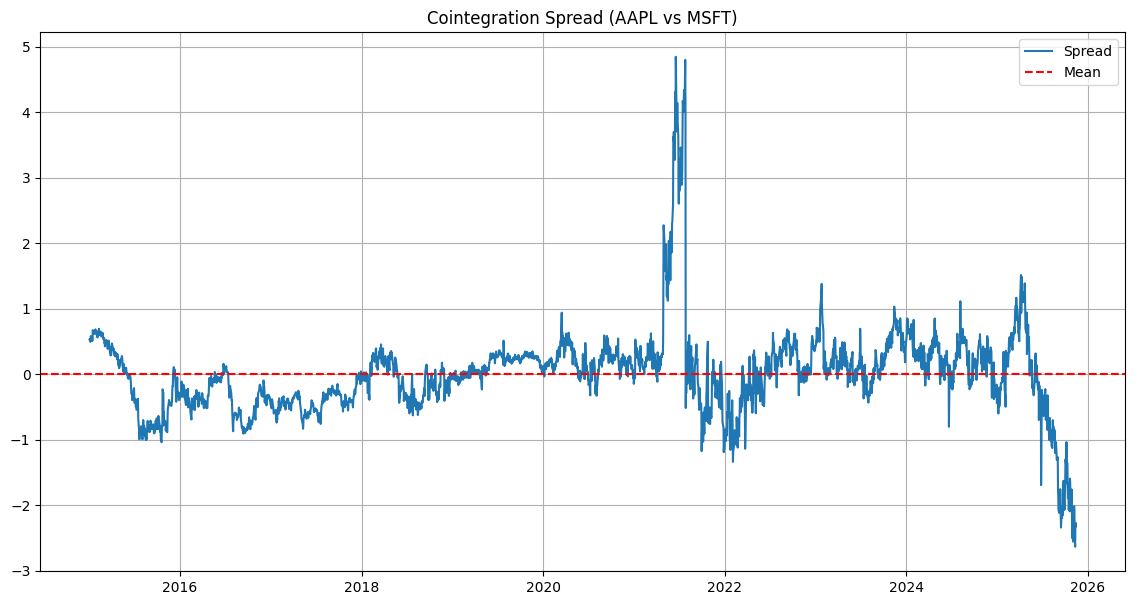

In [81]:
data = pd.DataFrame({
        'AAPL': df_a['adjClose'],
        'MSFT': df_b['adjClose']
    }).dropna()

stock_a = data['AAPL']
stock_b = data['MSFT']

if data.empty:
    print("No overlapping data found.")
else:
    print(f"Plotting with {len(data)} overlapping data points.")

    # --- Plot 1: Normalized Prices ---
    # Normalize prices to a 100 start
    normalized_a = (stock_a / stock_a.iloc[0]) * 100
    normalized_b = (stock_b / stock_b.iloc[0]) * 100
    
    plt.figure(figsize=(14, 7))
    plt.title('Normalized Prices (Start = 100)')
    plt.plot(normalized_a, label='AAPL')
    plt.plot(normalized_b, label='MSFT')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Plot 2: The Spread ---
    # To find the spread, we run a regression: stock_a = hedge_ratio * stock_b + intercept
    # The spread is the residual (error) of this regression
    
    # Add a constant (intercept) to the regressor
    stock_b_with_const = sm.add_constant(stock_b)
    
    # Run the OLS (Ordinary Least Squares) regression
    model = sm.OLS(stock_a, stock_b_with_const)
    results = model.fit()
    
    # The 'hedge_ratio' is the coefficient for 'MSFT'
    hedge_ratio = results.params['MSFT']
    
    # Calculate the spread: Spread = AAPL - (hedge_ratio * MSFT)
    # Or, we can just get the residuals from the model
    spread = results.resid

    plt.figure(figsize=(14, 7))
    plt.title('Cointegration Spread (AAPL vs MSFT)')
    plt.plot(spread, label='Spread')
    
    # Plot the mean line
    plt.axhline(spread.mean(), color='red', linestyle='--', label='Mean')
    
    plt.legend()
    plt.grid(True)
    plt.show()



In [96]:
a = "JPM"
b = 'BAC'
df_a = pdr.get_data_tiingo(a, api_key=TIINGO_API_KEY, start='2015-01-01')
df_b = pdr.get_data_tiingo(b, api_key=TIINGO_API_KEY, start='2015-01-01')
df_a.index = df_a.index.get_level_values('date')
df_b.index = df_b.index.get_level_values('date')
## Checking for cointegration
stock_a = df_a['adjClose']
stock_b = df_b['adjClose']

score, p_value,_ = coint(stock_a, stock_b)

print(f"Cointegration Test P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: The pair IS cointegrated (p < 0.05). We can proceed!")
else:
    print("Result: The pair is NOT cointegrated. (We'd stop here)")

data = pd.DataFrame({
        a: df_a['adjClose'],
        b: df_b['adjClose']
    }).dropna()

stock_a = data[a]
stock_b = data[b]

if data.empty:
    print("No overlapping data found.")
else:
    print(f"Plotting with {len(data)} overlapping data points.")

    # --- Plot 1: Normalized Prices ---
    # Normalize prices to a 100 start
    normalized_a = (stock_a / stock_a.iloc[0]) * 100
    normalized_b = (stock_b / stock_b.iloc[0]) * 100
    
    plt.figure(figsize=(14, 7))
    plt.title('Normalized Prices (Start = 100)')
    plt.plot(normalized_a, label='AAPL')
    plt.plot(normalized_b, label='MSFT')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Plot 2: The Spread ---
    # To find the spread, we run a regression: stock_a = hedge_ratio * stock_b + intercept
    # The spread is the residual (error) of this regression
    
    # Add a constant (intercept) to the regressor
    stock_b_with_const = sm.add_constant(stock_b)
    
    # Run the OLS (Ordinary Least Squares) regression
    model = sm.OLS(stock_a, stock_b_with_const)
    results = model.fit()
    
    # The 'hedge_ratio' is the coefficient for 'MSFT'
    hedge_ratio = results.params[b]
    
    # Calculate the spread: Spread = AAPL - (hedge_ratio * MSFT)
    # Or, we can just get the residuals from the model
    spread = results.resid

    plt.figure(figsize=(14, 7))
    plt.title(f'Cointegration Spread ({a} vs {b})')
    plt.plot(spread, label='Spread')
    
    # Plot the mean line
    plt.axhline(spread.mean(), color='red', linestyle='--', label='Mean')
    
    plt.legend()
    plt.grid(True)
    plt.show()


    

RemoteDataError: Unable to read URL: https://api.tiingo.com/tiingo/daily/JPM/prices?startDate=2015-01-01&endDate=2025-11-17&format=json
Response Text:
b'{"detail":"Error: You have run over your hourly request allocation. Please upgrade at https://api.tiingo.com/pricing to have your limits increased."}'